In [1]:
import os
import numpy as np
import pandas as pd
from helpers import slug
from sklearn import preprocessing

In [2]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
import plotly 
import plotly.plotly as py
import plotly.io as pio
import plotly.graph_objs as go
from IPython.display import Image
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
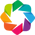

In [4]:
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

In [82]:
import re

re_non_word = re.compile(r'\W+')

def slug(s):
    return re.sub(re_non_word, '-', s).lower()

In [38]:
import valid_cmap_d
import plot_world_map
import income_plot
import cleanup_radar
import normalize_0to1

In [40]:
def valid_cmap_d(color):
    '''

    '''
    
    valid = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu',
             'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
             'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 
             'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 
             'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_rv', 'YlOrBr', 'YlOrBr_r', 
             'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumnv', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 
             'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
             'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
             'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 
             'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 
             'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
    
    if color in valid:
        return True
    else:
        return False

In [47]:
def plot_world_map(datafilename,c,title,cmap):
    '''
    Descitpion: Plots a heat map of a certain variable
            
        :Input Parameters: datafilename - name of data file (should be located in the same dirctory)
        :type: string
        :Input Parameters: c - name of data column (should start on line 1 in the csv file)
        :type: string
        :Input Parameters: title - title of plot
        :type: string
        :Input Parameters: cmap - color of heatmap
        :type: string
                    
        :Output Parameters: Plots a heatmap of the the world given 10 equal intervals of ranges             
    '''
    assert isinstance(datafilename, str) 
    assert isinstance(c, str) 
    assert isinstance(title, str) 
    assert isinstance(cmap, str) 
    assert valid_cmap_d(cmap) 
    
    datafile = os.path.expanduser(datafilename)   
    shapefile = os.path.expanduser('ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp')
    
    n_colors = 10
    figsize = (16, 10)

    cols = ['Country', 'Country Code', c] # TODO switch with new col
    imgfile = 'img/{}.png'.format(slug(title))
    description = ''' '''.strip()
    
    gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
    gdf.sample(5)
    
    df = pd.read_csv(datafile,  usecols=cols)
    df.sample(5)
    
    merged = gdf.merge(df, left_on='ADM0_A3', right_on='Country Code')
    merged.describe()
    
    ax = merged.dropna().plot(column=c, cmap=cmap, figsize=figsize, scheme='equal_interval', k=n_colors, legend=True)
    color = '#CBC4C2'
    merged[merged.isna().any(axis=1)].plot(ax=ax, color=color)
    ax.set_title(title,fontname='Arial',  fontdict={'fontsize': 20}, loc='left')
    ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')
    ax.set_axis_off()
    ax.set_xlim([-1.5e7, 1.7e7])
    ax.get_legend().set_bbox_to_anchor((.12, .4))
    ax.get_figure()

    return

In [42]:
def income_plot(df):
    '''
    Descitpion: PLots the data for different income groups.The plots are 
    Stacked Bar Plot for four different groups with the Year along 
    the x-axis and Diabetes Prevelance on the y-axis. 

        :Input Parameter: df
        :type: Pandas Data frame
        
        :Output Parameter: Chart
        :type: Holoviews Bar Plot Object
    '''
    
    assert isinstance(df,pd.DataFrame)
    assert not df.empty
    assert 'Year' in df.columns
    assert 'Type' in df.columns
    assert 'Prevalence' in df.columns
    
    df.rename(str.lower, axis='columns')

    %opts Bars [tools=['hover'],legend_position='left',color_index='Variable',width=900,height=400](alpha=0.5,color=hv.Palette('Category20'))
    
    chart = df.groupby(['Year','Type'])['Prevalence'].sum().unstack()\
                .hvplot.bar(stacked=True,ylabel='Percentage (%)')\
                .redim(value=hv.Dimension('value',label='Prevalence',range=(0,105)))
    return chart

In [24]:
def cleanup_radar(diab_data,bp_data,bmi_data,year = "2014"):
    '''
    Descitpion: Cleans up raw data from csv files and return a pandas data frame
    which has all the relevent columns from the differnt csv files for the data 
    pertaining to a certain Year. 

        :Input Parameter: diab_data
        :type: Pandas Data frame
        :Input Parameter: bp_data
        :type: Pandas Data frame
        :Input Parameter: bmi_data
        :type: Pandas Data frame
        :Input Parameter: year
        :type: Pandas Data string
        
        :Output Parameter: bmi
        :type: Pandas Data frame   
    '''
    
    assert isinstance(diab_data,pd.DataFrame)
    assert isinstance(bp_data,pd.DataFrame)
    assert isinstance(bmi_data,pd.DataFrame)
    assert isinstance(year,str)
    
    assert not diab_data.empty
    assert not bp_data.empty
    assert not bmi_data.empty
    
    assert 'Year' in diab_data.columns
    assert 'Year' in bp_data.columns
    assert 'Year' in bmi_data.columns
    
    assert 'Mean diastolic blood pressure (mmHg)' in bp_data.columns
    assert 'Mean systolic blood pressure (mmHg)' in bp_data.columns
    assert 'Age-standardised diabetes prevalence' in diab_data.columns
    
    diab = diab_data.loc[diab_data["Year"] == int(year)].reset_index() # Filtering out the dataframe only for the year you want 
    bp = bp_data.loc[bp_data["Year"] == int(year)].reset_index() # Filtering out the dataframe only for the year you want 
    bmi = bmi_data.loc[bmi_data["Year"] == int(year)].reset_index() # Filtering out the dataframe only for the year you want 

    bmi['Mean diastolic blood pressure (mmHg)'] = pd.Series(bp['Mean diastolic blood pressure (mmHg)']) # Appending Colums from different CSV to the bmi CSV
    bmi['Mean systolic blood pressure (mmHg)'] = pd.Series(bp['Mean systolic blood pressure (mmHg)']) # Appending Colums from different CSV to the bmi CSV
    bmi['Age-standardised diabetes prevalence'] = pd.Series(diab['Age-standardised diabetes prevalence']) # Appending Colums from different CSV to the bmi CSV

    return bmi, diab

In [25]:
def normalize_0to1(bmi):
    '''
    Descitpion: Normalize the whole data frame with values ranging from 0 to 1
    so that all the columns have the same range for the radar plot.

        :Input Parameter: bmi
        :type: Pandas Data frame
        
        :Output Parameter: bmi_normalized
        :type: Pandas Data frame
    '''
    
    assert isinstance(bmi,pd.DataFrame)
    assert not bmi.empty
    
    x = bmi.iloc[:,5:9].values # Returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler() # Normalizing
    x_scaled = min_max_scaler.fit_transform(x) # Normalizing
    bmi_normalized = pd.DataFrame(x_scaled) # Normalizing
    bmi_normalized['4'] = bmi_normalized[0] # Circulating the first colum to the last for radar plot
    
    return bmi_normalized

In [26]:
def gender_prevelance(bmi,gender,prevelance):
    '''
    Descitpion: Returns the relevent rows indices from the processed data frame of 
    the top 5 countries or the bottom 5 countries in terms of diabetes for 
    the gender specified.

        :Input Parameter: bmi
        :type: Pandas Data frame
        :Input Parameter: gender
        :type: Pandas Data string
        :Input Parameter: prevelance
        :type: Pandas Data string
        
        :Output Parameter: percent
        :type: pandas.core.indexes.numeric.Int64Index
    '''
    
    assert isinstance(bmi,pd.DataFrame)
    assert not bmi.empty
    assert 'Age-standardised diabetes prevalence' in bmi.columns
    assert gender in {'men','women'}
    assert prevelance in {'maximum','minimum'}
    
    if gender == 'men':
        bmi_men = bmi.iloc[:200] #0:200 for men 
        if prevelance == 'maximum':
            percent = bmi_men.nlargest(5,'Age-standardised diabetes prevalence').index # Get the country indices for 5 countries with the lowest prevelance
        else:
            percent = bmi_men.nsmallest(5,'Age-standardised diabetes prevalence').index # Get the country indices for 5 countries with the lowest prevelance
    else:
        bmi_women = bmi.iloc[200:] #200: for women
        if prevelance == 'maximum':
            percent = bmi_women.nlargest(5,'Age-standardised diabetes prevalence').index # Get the country indices for 5 countries with the lowest prevelance
        else:
            percent = bmi_women.nsmallest(5,'Age-standardised diabetes prevalence').index # Get the country indices for 5 countries with the lowest prevelance
        
    return percent

In [27]:
def DataToPlot(diab, bmi_normalized, max_prevelance):
    '''
    Descitpion: The Data of the top 5 countries or the bottom 5 countries 
    to be plotted as radar plot in plotly

        :Input Parameter: diab
        :type: Pandas Data frame
        :Input Parameter: bmi_normalized
        :type: Pandas Data frame
        :Input Parameter: max_prevelance
        :type: pandas.core.indexes.numeric.Int64Index
        
        :Output Parameter: data
        :type: List
        :Output Parameter: data_avg_max_min
        :type: List 
    '''
    
    assert isinstance(bmi_normalized,pd.DataFrame)
    assert isinstance(diab,pd.DataFrame)
    assert not bmi_normalized.empty
    assert not diab.empty
    
    mylst1 = bmi_normalized.values.tolist()[max_prevelance[0]] 
    country_name1 = diab.iloc[max_prevelance[0],1]

    mylst2 = bmi_normalized.values.tolist()[max_prevelance[1]] 
    country_name2 = diab.iloc[max_prevelance[1],1]

    mylst3 = bmi_normalized.values.tolist()[max_prevelance[2]] 
    country_name3 = diab.iloc[max_prevelance[2],1]

    mylst4 = bmi_normalized.values.tolist()[max_prevelance[3]] 
    country_name4 = diab.iloc[max_prevelance[3],1]

    mylst5 = bmi_normalized.values.tolist()[max_prevelance[4]] 
    country_name5 = diab.iloc[max_prevelance[4],1]
    
    avg = []
    for i in range(5):
        avg.append((mylst1[i]+mylst2[i]+mylst3[i]+mylst4[i]+mylst5[i])/5)
    
    ### Plotting
    data = [go.Scatterpolar(
              name = country_name1,
              r = mylst1,
              theta = ['BMI','Mean diastolic blood pressure','Mean systolic blood pressure','Diabetes prevalence','BMI'],
              line = dict(color = 'green')
            ),

            go.Scatterpolar(
            name = country_name2,
            r = mylst2,
            theta = ['BMI','Mean diastolic blood pressure','Mean systolic blood pressure','Diabetes prevalence','BMI'],
            line = dict(color = 'blue')
            ),

            go.Scatterpolar(
            name = country_name3,
            r = mylst3,
            theta = ['BMI','Mean diastolic blood pressure','Mean systolic blood pressure','Diabetes prevalence','BMI'],
            line = dict(color = 'red')
            ),

            go.Scatterpolar(
            name = country_name4,
            r = mylst4,
            theta = ['BMI','Mean diastolic blood pressure','Mean systolic blood pressure','Diabetes prevalence','BMI'],
            line = dict(color = 'yellow')
            ),

            go.Scatterpolar(
            name = country_name5,
            r = mylst5,
            theta = ['BMI','Mean diastolic blood pressure','Mean systolic blood pressure','Diabetes prevalence','BMI'],
            line = dict(color = 'orange')
            ),
            ]
    
    ### Plotting for average
    data_avg_max_min = [go.Scatterpolar(
        name = 'Average',
        r = avg,
        theta = ['BMI','Mean diastolic blood pressure','Mean systolic blood pressure','Diabetes prevalence','BMI'],
        line = dict(color = 'green')
        )]
    
    return data, data_avg_max_min

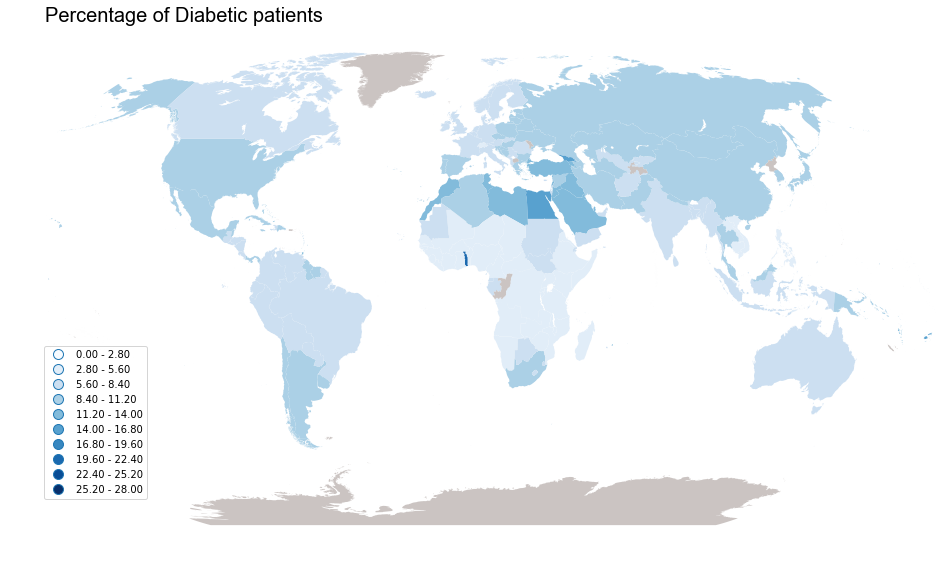

In [48]:
## World Map PLot for Diabetes Prevalence
datafilename = 'country_data.csv'
c = 'Diabetes Total per'
title = 'Percentage of Diabetic patients'
color = 'Blues'
plot_world_map(datafilename,c,title,color)

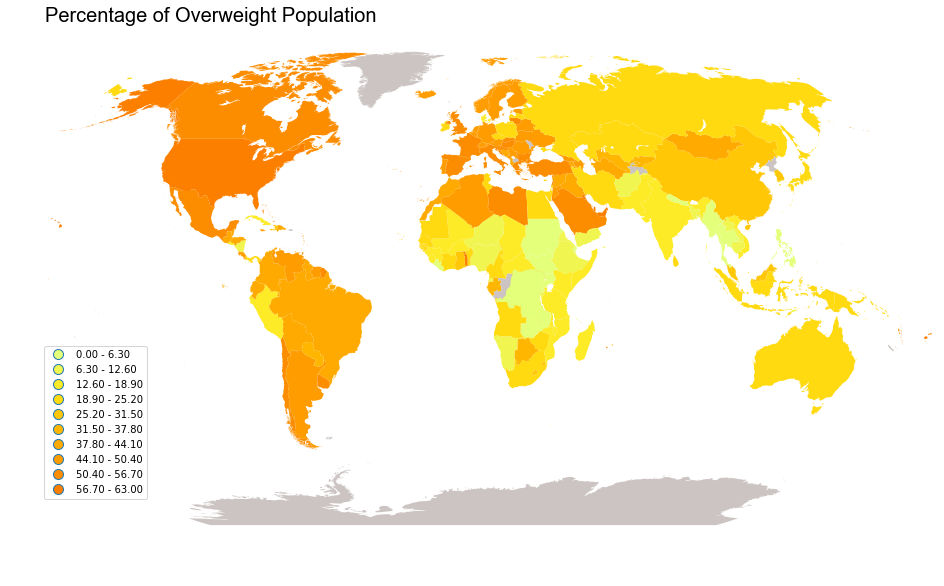

In [29]:
## World Map PLot for Overweight Prevalence
color = 'Wistia'
datafilename = 'country_data.csv'
c = 'Overweight Total per'
title = 'Percentage of Overweight Population'
cmap = 'Wistia'
plot_world_map(datafilename,c,title,cmap)

In [30]:
## Risk Factors Radar Plot of Top 5 Countries & Average 
diab_data = pd.read_csv("diab.csv", usecols = ['Country/Region/World','ISO','Sex','Year','Age-standardised diabetes prevalence'])
bp_data = pd.read_csv("bp.csv", usecols = ['Country/Region/World','ISO','Sex','Year','Mean systolic blood pressure (mmHg)', 'Mean diastolic blood pressure (mmHg)'])
bmi_data = pd.read_csv("bmidata.csv", usecols = ['Country/Region/World','ISO','Sex','Year','Mean BMI'])

(df, diab) = cleanup_radar(diab_data,bp_data,bmi_data,"2014")
df_normalized = normalize_0to1(df)

max_prevelance = gender_prevelance(df,'men','maximum')
(data_max_prevalence, data_avg_max) = DataToPlot(diab, df_normalized, max_prevelance)

## Risk Factors Radar Plot of Lowest 5 Countries & Average 
min_prevelance = gender_prevelance(df,'men','minimum')
(data_min_prevelance, data_avg_min) = DataToPlot(diab, df_normalized, min_prevelance)

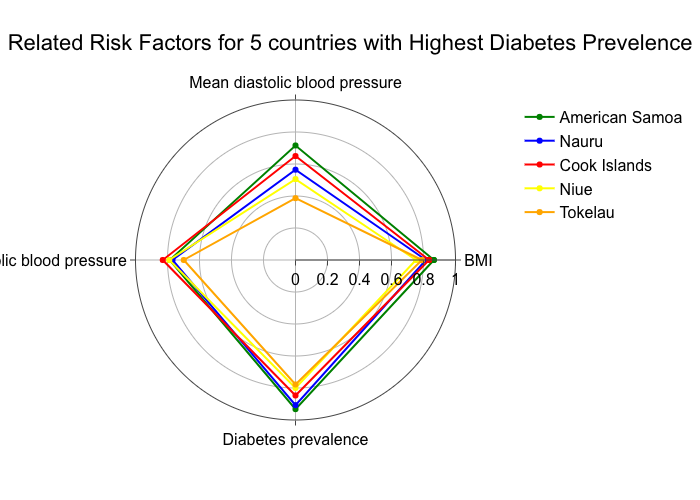

In [31]:
layout_max_prevalence = go.Layout(title='Related Risk Factors for 5 countries with Highest Diabetes Prevelence',font=dict(family='Arial', size=16, color='black'),
polar = dict(radialaxis = dict(visible = True,range = [0, 1])),showlegend = True)
fig = go.Figure(data=data_max_prevalence, layout=layout_max_prevalence)
static_image_bytes = pio.to_image(fig, format='png')
Image(static_image_bytes)

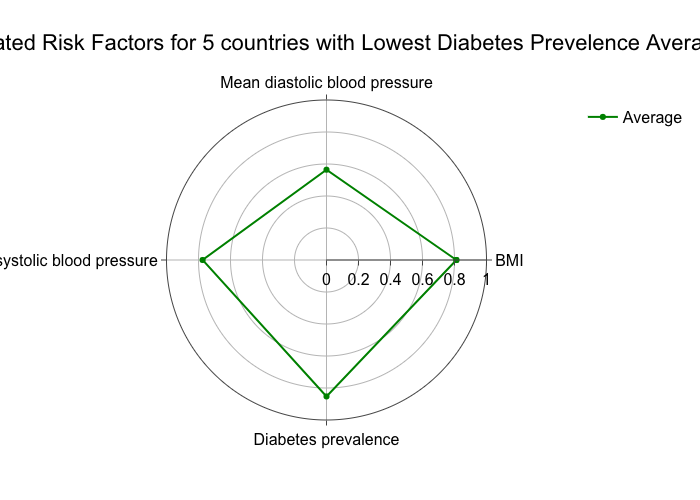

In [32]:
layout_avg_max = go.Layout(title='Related Risk Factors for 5 countries with Lowest Diabetes Prevelence Averaged',font=dict(family='Arial', size=16, color='black'),
polar = dict(radialaxis = dict(visible = True,range = [0, 1])),showlegend = True)
fig = go.Figure(data=data_avg_max, layout=layout_avg_max)
static_image_bytes = pio.to_image(fig, format='png')
Image(static_image_bytes)

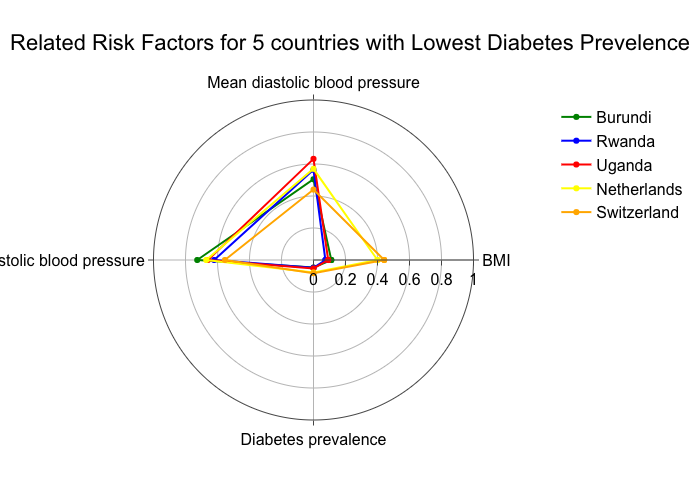

In [72]:
layout = go.Layout(title='Related Risk Factors for 5 countries with Lowest Diabetes Prevelence',font=dict(family='Arial', size=16, color='black'),
polar = dict(radialaxis = dict(visible = True,range = [0, 1])),showlegend = True)
fig = go.Figure(data=data_min_prevelance, layout=layout)
static_image_bytes = pio.to_image(fig, format='png')
Image(static_image_bytes)

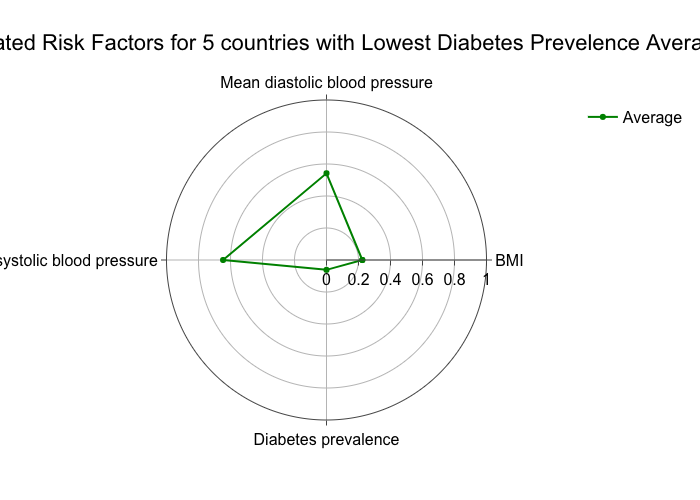

In [73]:
layout_avg_min = go.Layout(title='Related Risk Factors for 5 countries with Lowest Diabetes Prevelence Averaged',font=dict(family='Arial', size=16, color='black'),
polar = dict(radialaxis = dict(visible = True,range = [0, 1])),showlegend = True)
fig = go.Figure(data=data_avg_min, layout=layout_avg_min)
static_image_bytes = pio.to_image(fig, format='png')
Image(static_image_bytes)

E:\Users\zoom\Anaconda3\lib\site-packages\plotly\figure_factory\_county_choropleth.py:772: UserWarning:

Unrecognized FIPS Values

Whoops! It looks like you are trying to pass at least one FIPS value that is not in our shapefile of FIPS and data for the counties. Your choropleth will still show up but these counties cannot be shown.
Unrecognized FIPS are: [2280]



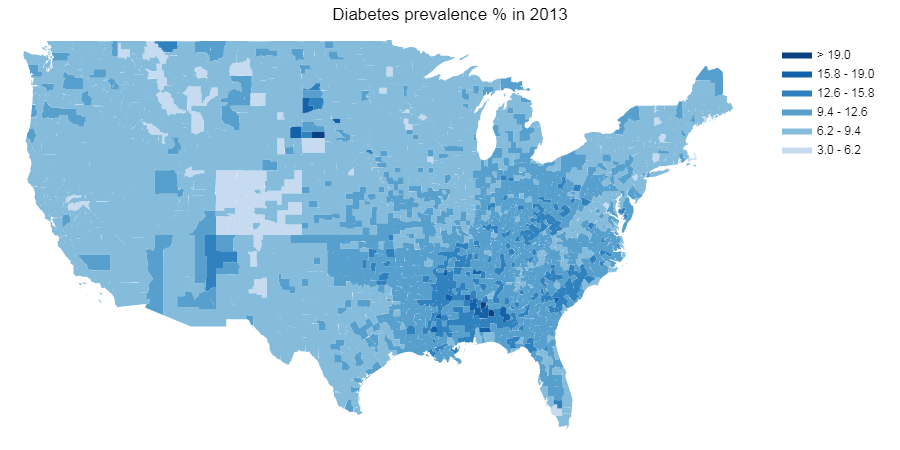

In [12]:
## United States Map Plot for Diabetes Prevalence
import plot_us_maps as pum

# Read the excel file
df_sample = pd.read_excel('DM_PREV_ALL_STATES.xlsx')

plot = pum.plot_map(df_sample,3,19,'Diabetes')
static_image_bytes = pio.to_image(plot, format='png')
Image(static_image_bytes)

E:\Users\zoom\Anaconda3\lib\site-packages\plotly\figure_factory\_county_choropleth.py:772: UserWarning:

Unrecognized FIPS Values

Whoops! It looks like you are trying to pass at least one FIPS value that is not in our shapefile of FIPS and data for the counties. Your choropleth will still show up but these counties cannot be shown.
Unrecognized FIPS are: [2280]



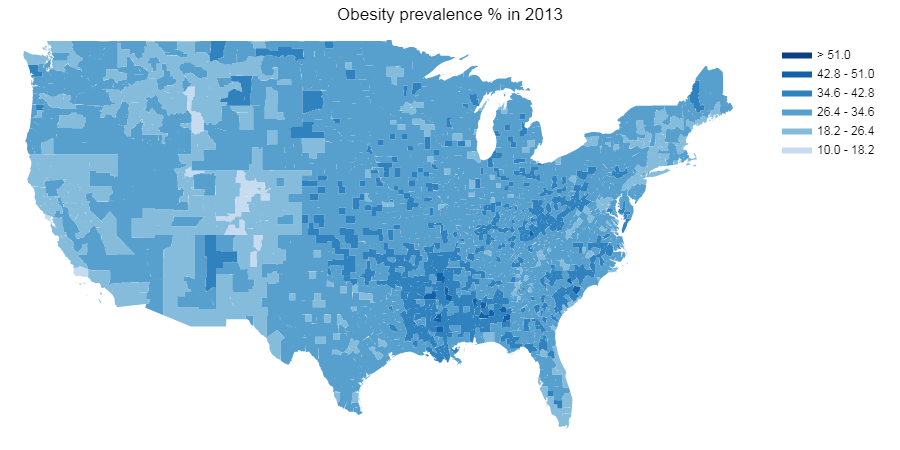

In [13]:
## United States Map PLot for Obesity Prevalence
df_sample = pd.read_excel('OB_PREV_ALL_STATES.xlsx')

plot = pum.plot_map(df_sample,10,51,'Obesity')
static_image_bytes = pio.to_image(plot, format='png')
Image(static_image_bytes)

E:\Users\zoom\Anaconda3\lib\site-packages\plotly\figure_factory\_county_choropleth.py:772: UserWarning:

Unrecognized FIPS Values

Whoops! It looks like you are trying to pass at least one FIPS value that is not in our shapefile of FIPS and data for the counties. Your choropleth will still show up but these counties cannot be shown.
Unrecognized FIPS are: [2280]



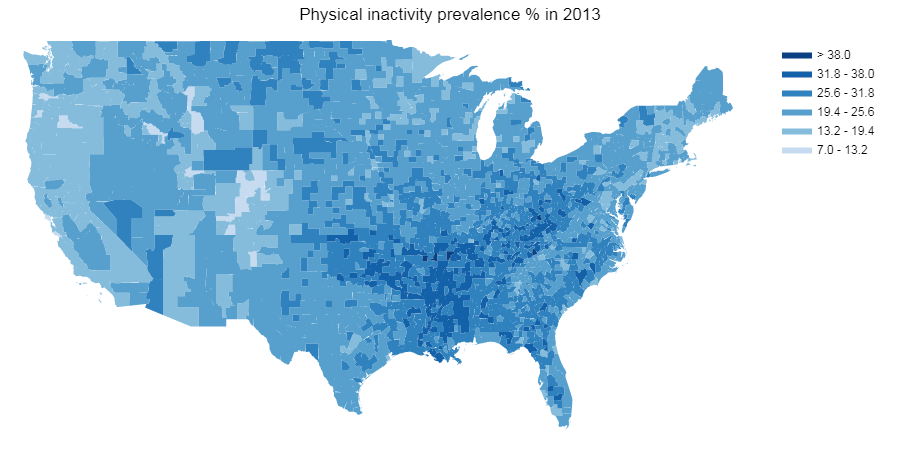

In [15]:
## United States Map PLot for Physical Inactivity Prevalence
df_sample = pd.read_excel('LTPIA_PREV_ALL_STATES.xlsx')

plot= pum.plot_map(df_sample,7,38,'Physical inactivity')
static_image_bytes = pio.to_image(plot, format='png')
Image(static_image_bytes)

In [3]:
import correlation_plot as cp
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

E:\Users\zoom\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 1.0, 'Obesity vs diabetes')

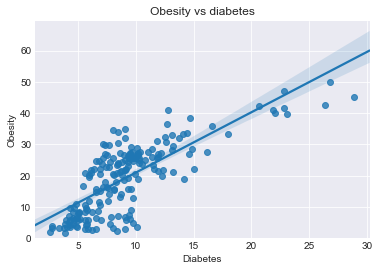

In [10]:
## Global Obesity vs Diabetes Correlation Plot
df = pd.read_csv('final_country_data.csv')
d = df['Total Diabetes']
o = df['Total Obesity']
cp.plot_correlation(d,o,'Obesity vs diabetes','Diabetes','Obesity',blank='dots')

E:\Users\zoom\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 1.0, 'Obesity vs diabetes (US)')

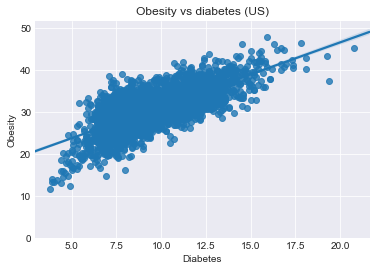

In [4]:
## US Obesity vs Diabetes Correlation Plot
import plot_us_maps as pum
dia_df = pd.read_excel('DM_PREV_ALL_STATES.xlsx')
obe_df = pd.read_excel('OB_PREV_ALL_STATES.xlsx')
list_dia = pum.get_df(dia_df)
list_obe = pum.get_df(obe_df)
d = list_dia[-1]['age-adjusted percent']
o = list_obe[-1]['age-adjusted percent']
cp.plot_correlation(d,o,'Obesity vs diabetes (US)','Diabetes','Obesity',blank='str')

Text(0.5, 1.0, 'Inactivity vs diabetes (US)')

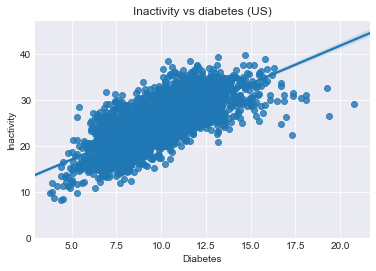

In [5]:
## US Physical Inactivity vs Diabetes Correlation Plot
dia_df = pd.read_excel('DM_PREV_ALL_STATES.xlsx')
phy_df = pd.read_excel('LTPIA_PREV_ALL_STATES.xlsx')
list_dia = pum.get_df(dia_df)
list_phy = pum.get_df(phy_df)
d = list_dia[-1]['age-adjusted percent']
p = list_phy[-1]['age-adjusted percent']
cp.plot_correlation(d,p,'Inactivity vs diabetes (US)','Diabetes','Inactivity',blank='str')

In [6]:
plt.style.use('default')

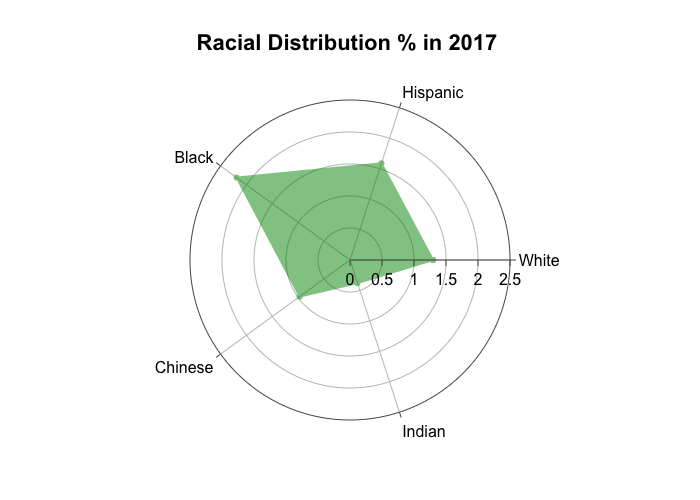

In [5]:
## Race Radar Plot
import plot_race_radar as prr

df = pd.read_csv('personsx.csv')
p = prr.plot_race_radar(df,'2017','green')
static_image_bytes = pio.to_image(p, format='png')
Image(static_image_bytes)

/Users/Tejas/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning:

Columns (31,50,51,55,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,161,162,199,201,204,206,209,211,214,216,219,221,224,225,226,227,228,229,231,234,236,239,241,244,246,249,251,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,281,284,285,286,287,288,289,290,291,292,293,294,296,299,300,301,302,303,304,305,306,307,308,309,311,314,315,316,317,318,319,320,321,322,323,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,362,363,365,366,367,368,369,370,371,372,373,375,377,378,385,386,388,390,392,424,429,430,431,432,443,44

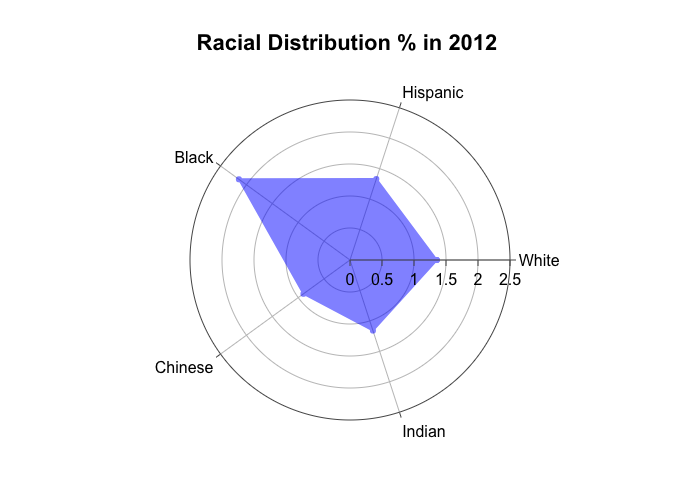

In [6]:
df = pd.read_csv('personsx2012.csv')
p = prr.plot_race_radar_older(df,'2012','blue')
static_image_bytes = pio.to_image(p, format='png')
Image(static_image_bytes)

/Users/Tejas/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning:

Columns (31,51,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,154,156,157,194,196,199,200,201,202,203,204,206,209,211,214,216,219,220,221,222,223,224,226,229,231,234,236,239,241,244,246,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,271,274,276,279,280,281,282,283,284,285,286,287,288,289,291,294,295,296,297,298,299,300,301,302,303,304,306,309,310,311,312,313,314,315,316,317,318,319,320,322,323,324,325,326,327,328,329,330,331,332,333,334,335,337,338,339,340,341,342,343,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,380,381,383,385,387,435,445,448,464,465,466,491,543,5

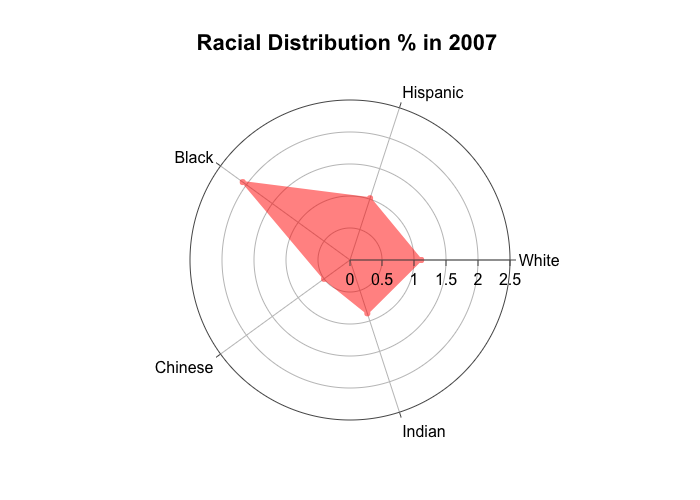

In [7]:
df = pd.read_csv('personsx2007.csv')
p = prr.plot_race_radar_older(df,'2007','red')
static_image_bytes = pio.to_image(p, format='png')
Image(static_image_bytes)

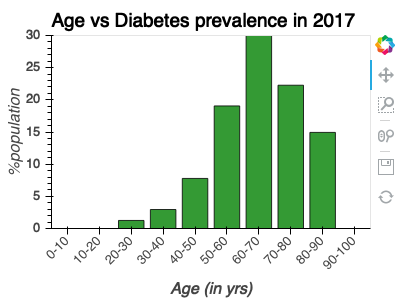

In [9]:
## Age vs Diabetes Prevalence Plots
import bar_plots_age as bpa
# Read csv file
df = pd.read_csv('personsx.csv')
# Filter for diabetic people
dia_loc = df.loc[df['LACHRC10']==1]
# Get ages of diabetic people
age = dia_loc['AGE_P']

data,mean_age_2017  = bpa.process_ages(age)
plot = bpa.draw_age(data,'2017')
hv.save(plot,'bokeh_images/age_2017.png')
Image('bokeh_images/age_2017.png')

/Users/Tejas/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning:

Columns (31,50,51,55,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,161,162,199,201,204,206,209,211,214,216,219,221,224,225,226,227,228,229,231,234,236,239,241,244,246,249,251,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,281,284,285,286,287,288,289,290,291,292,293,294,296,299,300,301,302,303,304,305,306,307,308,309,311,314,315,316,317,318,319,320,321,322,323,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,362,363,365,366,367,368,369,370,371,372,373,375,377,378,385,386,388,390,392,424,429,430,431,432,443,44

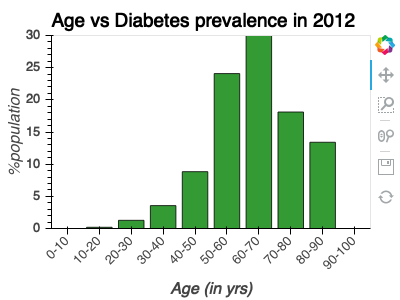

In [11]:
# Read csv file
df = pd.read_csv('personsx2012.csv')
# Filter for diabetic people
dia_loc = df.loc[df['LACHRC10']=='1 Chronic']
# Get ages of diabetic people
age = dia_loc['AGE_P']

data,mean_age_2012 = bpa.process_ages_older(age)
plot = bpa.draw_age(data,'2012')
hv.save(plot,'bokeh_images/age_2012.png')
Image('bokeh_images/age_2012.png')

/Users/Tejas/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning:

Columns (31,51,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,154,156,157,194,196,199,200,201,202,203,204,206,209,211,214,216,219,220,221,222,223,224,226,229,231,234,236,239,241,244,246,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,271,274,276,279,280,281,282,283,284,285,286,287,288,289,291,294,295,296,297,298,299,300,301,302,303,304,306,309,310,311,312,313,314,315,316,317,318,319,320,322,323,324,325,326,327,328,329,330,331,332,333,334,335,337,338,339,340,341,342,343,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,380,381,383,385,387,435,445,448,464,465,466,491,543,5

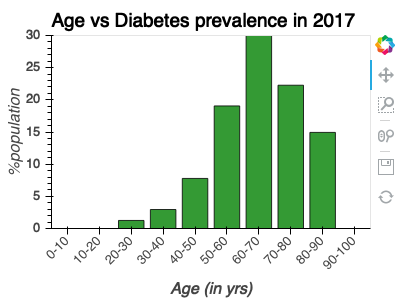

In [12]:
# Read csv file
df = pd.read_csv('personsx2007.csv')
# Filter for diabetic people
dia_loc = df.loc[df['LACHRC10']=='1 Chronic']
# Get ages of diabetic people
age = dia_loc['AGE_P']

data,mean_age_2007 = bpa.process_ages_older(age)
plot = bpa.draw_age(data,'2007')
hv.save(plot,'bokeh_images/age_2007.png')
Image('bokeh_images/age_2017.png')

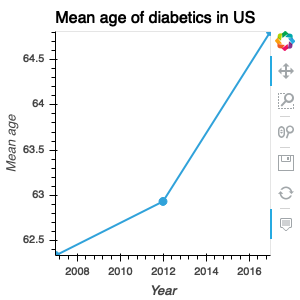

In [14]:
## Mean Age Trend in US Plot
import plot_mean_age as pma

# mean ages
y = [mean_age_2007,mean_age_2012,mean_age_2017]
# years
x = [2007,2012,2017]
# plot
plot = pma.plot_mean_age(x,y)
hv.save(plot,'bokeh_images/mean_age.png')
Image('bokeh_images/mean_age.png')

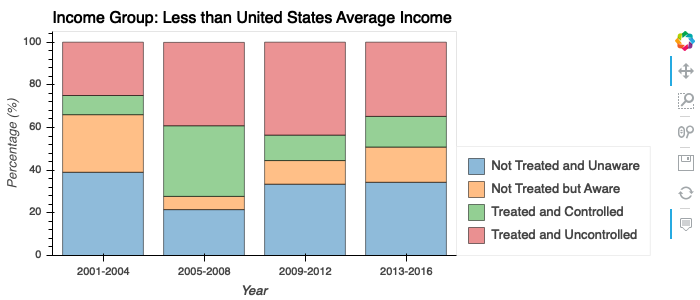

In [17]:
## Income plot Income Group: Less than United States Average Income
less1 = pd.read_csv('income_data_less1.csv')
plot = income_plot(less1).relabel('Income Group: Less than United States Average Income')
hv.save(plot,'bokeh_images/less1.png')
Image('bokeh_images/less1.png')

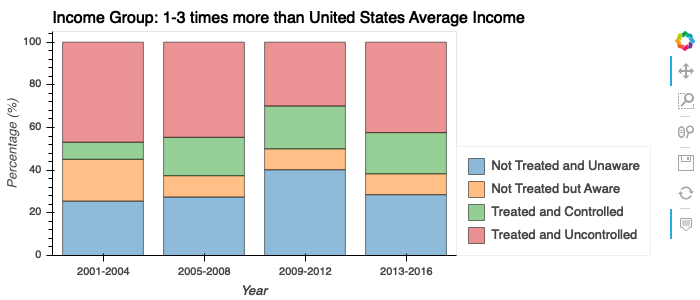

In [18]:
## Income plot Income Group: 1-3 times more than United States Average Income
one_three = pd.read_csv('income_data1_3.csv')
plot = income_plot(one_three).relabel('Income Group: 1-3 times more than United States Average Income')
hv.save(plot,'bokeh_images/one_three.png')
Image('bokeh_images/one_three.png')

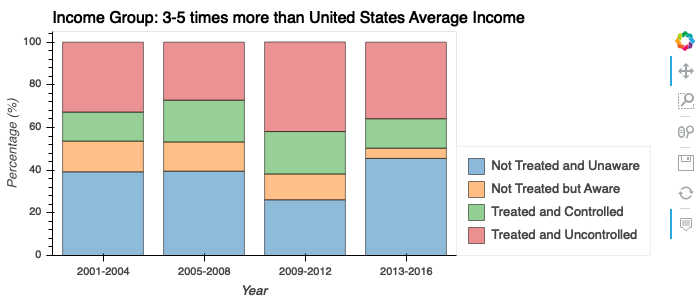

In [19]:
## Income plot Income Group: 3-5 times more than United States Average Income
three_five = pd.read_csv('income_data3_5.csv')
plot = income_plot(three_five).relabel('Income Group: 3-5 times more than United States Average Income')
hv.save(plot,'bokeh_images/three_five.png')
Image('bokeh_images/three_five.png')

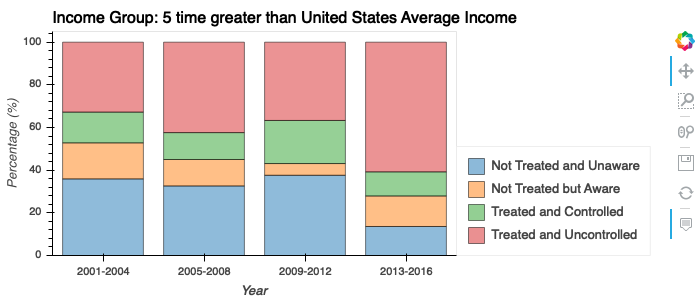

In [20]:
## Income plot Income Group: 5 time greater than United States Average Income
greater_5 = pd.read_csv('income_datag5.csv')
plot = income_plot(greater_5).relabel('Income Group: 5 time greater than United States Average Income')
hv.save(plot,'bokeh_images/greater_5.png')
Image('bokeh_images/greater_5.png')